# TASK 1: Retrieving and Preparing the Data

In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
# Label encoding - is used to change the categorical value to numeric
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold


In [2]:
# Reading the online_shoppers_intention file in offline method. File is saved in same directory inside input folder
# Header is stored in the 1st line
online_shop = pd.read_csv('./input/online_shoppers_intention.csv', sep=',', decimal='.', header=0,)

online_shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Checking whether the data is equal to the source document. No. of rows and columns are equal or not 
online_shop.shape

(12330, 18)

In [4]:
# Checking list of columns
online_shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# Checking the datatypes of the features
online_shop.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
# Using .info() method to check the type of the column and the non-null values
online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Checking for NULL values in all columns
online_shop.isnull().sum() #Should retuen 0 for each column if there are no NULL Values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Describing the dataset to check for overall informations
online_shop.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [9]:
# Checking whether the values in Month column are valid or not
online_shop['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [10]:
# Checking whether the values in VisitorType column are valid or not
online_shop['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [11]:
# Checking whether the values in Weekend column are valid or not
online_shop['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [12]:
# Assigning LabelEncoder() to a variable
l = LabelEncoder()

In [13]:
# Changing VisitorType to numeric
online_shop['VisitorType'] = l.fit_transform(online_shop['VisitorType'])
online_shop['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [14]:
# # Label encoding of weekend

# online_shop['Weekend'] = le.fit_transform(online_shop['Weekend'])
# online_shop['Weekend'].value_counts()

In [15]:
#Changing Month to numeric
online_shop['Month'] = l.fit_transform(online_shop['Month'])
online_shop['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [16]:
# Checking whether the values in Weekend column are valid or not
online_shop['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [17]:
# Checking whether the values in OperatingSystems column are valid or not
online_shop['OperatingSystems'].value_counts() # Top 3 OS contributes the majority

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [18]:
# Checking whether the values in Browser column are valid or not
online_shop['Browser'].value_counts() 

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [19]:
# Checking whether the values in Region column are valid or not
online_shop['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [20]:
# Sanity check for Special Day column ( SHould be between 0 and 1 as per the dataset description)
online_shop[ (online_shop['SpecialDay'] > 1 ) | (online_shop['SpecialDay'] < 0 )] # Should return 0 row if values are correct

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [21]:
# Check for duplicate rows
duplicate_rows = online_shop.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_df = online_shop[duplicate_rows]
duplicate_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,3,2,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,3,2,3,3,2,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,3,2,3,3,2,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,1,1,1,1,2,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,2,2,4,1,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,2,0,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,4,1,2,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,3,2,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,13,9,20,2,False,False


In [22]:
# Since there are duplicate rows present, we are removing them
online_shop = online_shop.drop_duplicates()
online_shop.shape

(12205, 18)

In [23]:
# For ignoring the warnings
warnings.filterwarnings("ignore")

# Task2: Data Exploration

# Coulumn Wise Analysis

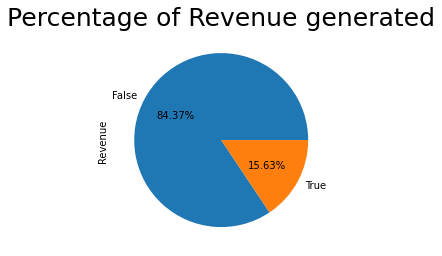

<Figure size 504x504 with 0 Axes>

In [24]:
# Checking the percentage of customers have Purchase or not in online shopping
online_shop['Revenue'].value_counts().plot(kind= 'pie', autopct='%.2f%%')
plt.title('Percentage of Revenue generated', fontsize = 25)
plt.figure(figsize=(7, 7))
plt.show()

# Observation: Around 84 percentage of the people who visit online shopping have not purchased.
# The False percentage is high

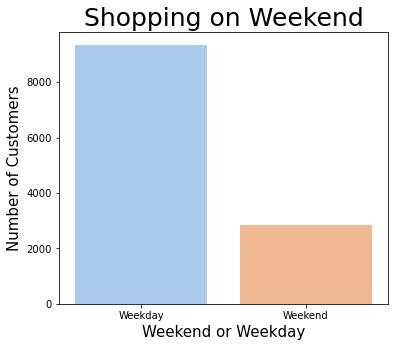

In [25]:
# Number of customers who have visited page on Weekends
plt.rcParams['figure.figsize'] = (13, 5)
plt.subplot(1, 2, 1)
sns.countplot(online_shop['Weekend'], palette = 'pastel')
plt.title('Shopping on Weekend', fontsize = 25)
plt.xlabel('Weekend or Weekday', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Observation: Since weekday consist of more no. of days, the number of customers are high on weekdays as compared to weekend.

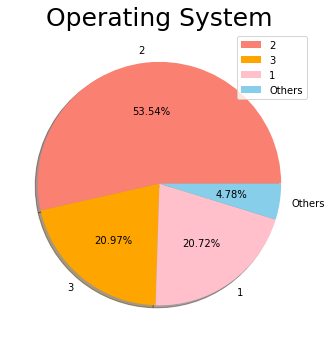

In [26]:
# Operating Systems

# Manually setting the size of top3 and other OS. The numbers were calculated in data preparation step.
plt.figure(figsize=(12, 7))
size = [6601, 2585, 2555, 589]
colors = ['salmon', '#FFA500', 'pink', 'skyblue']
labels = "2", "3", "1", "Others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Operating System', fontsize = 25)
plt.legend()
plt.show()

# Observation:
#1: The top 3 OS contribute the majority percentage of data.
#2: '2' contributes 50% of the contribution
#3: '3' and '1' have similar percentage


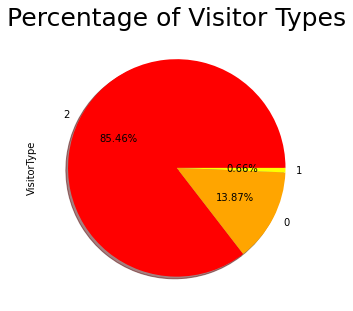

<Figure size 864x504 with 0 Axes>

In [27]:
# Plotting the percentage of visitor types
# '0' : New Visitor
# '2' : Returning Visitor
# '1' : Others
colors = ['red', 'orange', 'yellow']
visitors=online_shop['VisitorType'].value_counts().plot(kind='pie',autopct='%.2f%%', colors=colors, shadow = True)
plt.title('Percentage of Visitor Types', fontsize = 25)
plt.figure(figsize=(12, 7))
plt.show()


# Observation:
#1: The number of returning customers is very high(84 percent).
#2: 'Other' customer is less than 1 percent.


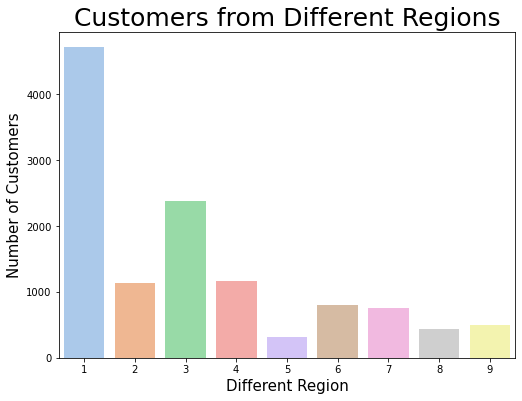

In [28]:
# Number of customers coming from different regions
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(online_shop['Region'], palette = 'pastel')
plt.title('Customers from Different Regions', fontsize = 25)
plt.xlabel('Different Region', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xticks([0,1,2,3,4,5,6,7,8], ['1', '2','3','4','5','6','7','8','9'])
plt.show()

# Observation
#1: 1st Region has the highest number of customer.
#2: 3rd Region is half of 1st region.
#3: All the other regions are relatively low as compared to 1st region
#4: 5th Region has lowest number of customers.

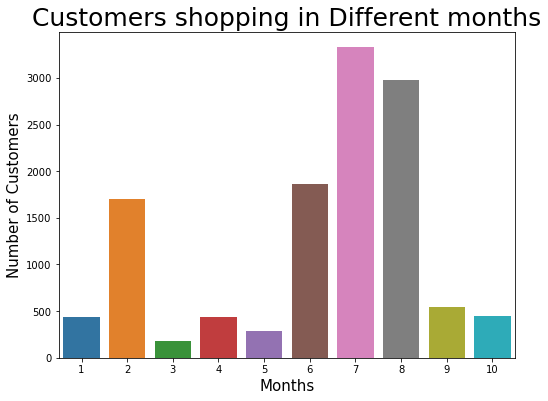

In [29]:
# Number of customers - Month wise Distribution
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(online_shop['Month'])
plt.title('Customers shopping in Different months', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['1', '2','3','4','5','6','7','8','9','10'])
plt.show()

# Observation
# May     3364
# Nov     2998
# Mar     1907
# Dec     1727
# Oct      549
# Sep      448
# Aug      433
# Jul      432
# June     288
# Feb      184

#1: May month has highest number of customers.
#2: Feb has least number of customers.
#3: May, Nov, Mar and Dec contribute majority.


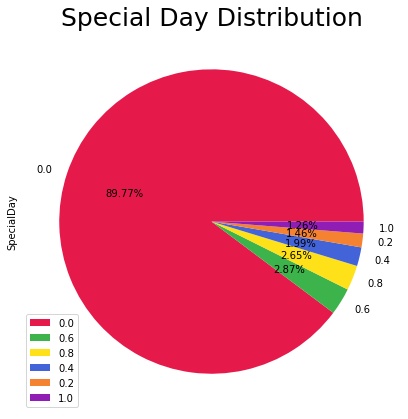

In [30]:
# SpecialDay disturbution
plt.figure(figsize=(7, 7))
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4']
online_shop['SpecialDay'].value_counts().plot(kind='pie',autopct='%.2f%%',colors = colors,legend= True)
plt.title('Special Day Distribution', fontsize = 25)
plt.legend(loc = 'lower left')
plt.show()

# Observation:
# 1: There are only 10 percent of data contributes to special days.

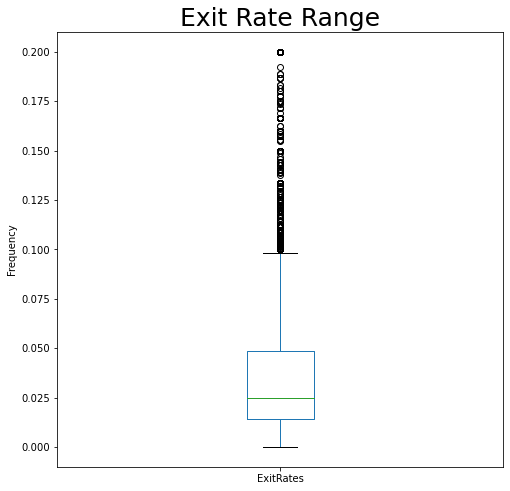

In [31]:
# Exit rates
plt.figure(figsize=(8, 8))
online_shop['ExitRates'].plot(kind='box')
plt.title('Exit Rate Range', fontsize = 25)
plt.ylabel('Frequency')
plt.show()

# Observation:
# There are many outliers present in this.


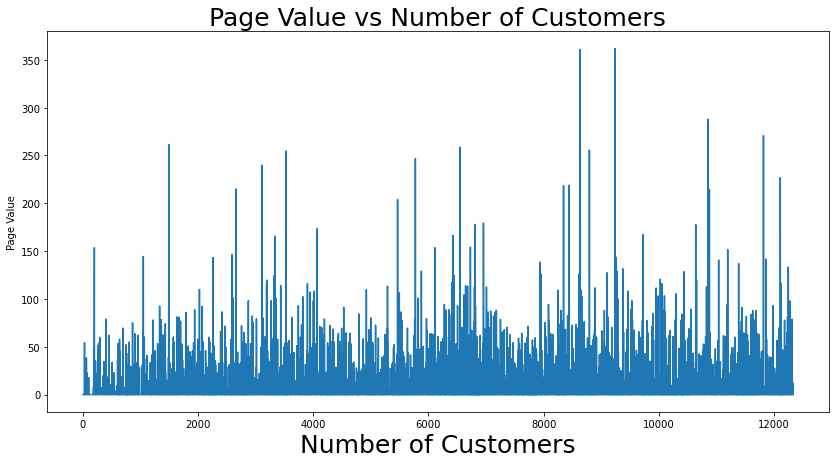

In [32]:
# Page Value Distribution. It is the average number of pages visited before completing the transaction.
# x=onlPageValues
plt.figure(figsize=(14, 7))
plt.plot(online_shop['PageValues'])
plt.xlabel('Number of Customers', fontsize = 25)
plt.ylabel('Page Value')
plt.title('Page Value vs Number of Customers', fontsize = 25)
plt.show()
           
# Observation:
# 1: The majority of page value are in range 0 to 60.
# 2: There are also customers who have page value more than 100, but it is very low           

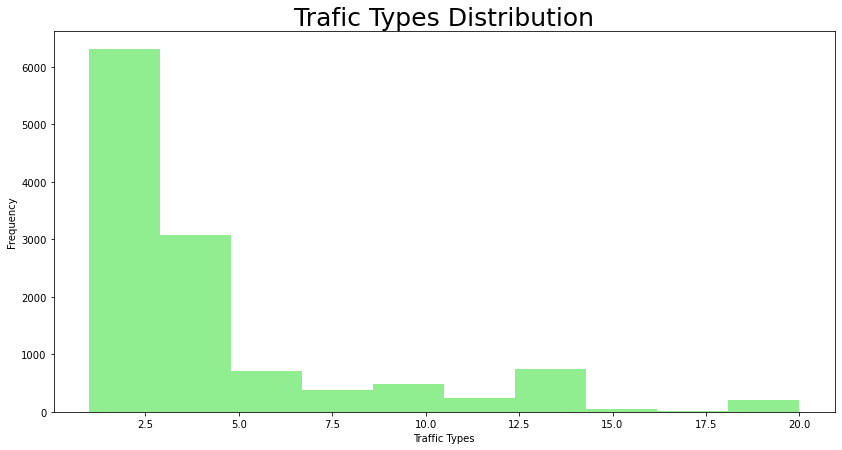

In [33]:
# Plotting different traffic types
plt.figure(figsize=(14, 7))
plt.hist(online_shop['TrafficType'], bins=10, color = 'lightgreen')  # Adjust the number of bins as per your requirement
plt.xlabel('Traffic Types')
plt.ylabel('Frequency')
plt.title('Trafic Types Distribution', fontsize = 25)

# Display the histogram
plt.show()

# Observation:
# 1: The first five types contribute the majority


# Pair Column Exploration

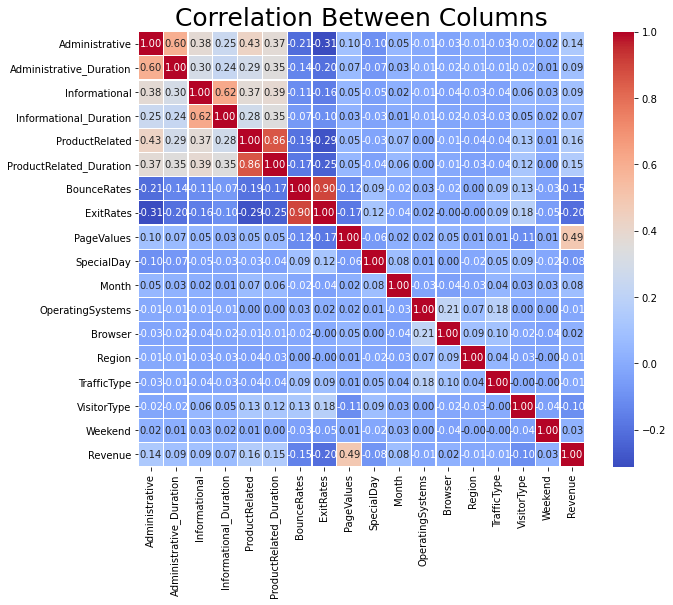

In [34]:
# Heatmap to check the Cor-relation between numeric columns
corr_matrix = online_shop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Between Columns', fontsize = 25)
plt.show()

#Observation
# 1: The target column Revenue has highest correlation with the PageValues column.
# 2: BounceRates and Exit rate have high dependancy on each other.
# 3: Administrative vs Admministrative_Duration have high corelation.
# 4: Informational vs Informational_Duration have high corelation.
# 5: ProductRelated vs ProductRelated_Duration have high corelation.

Text(0.5, 1.0, 'ProductRelated Vs ProductRelated_Duration')

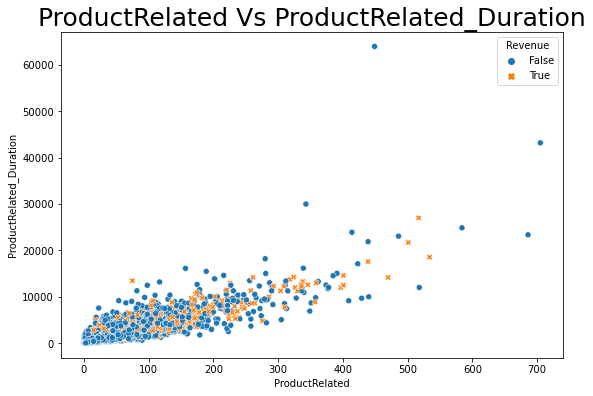

In [35]:
# Scatter plot to show ProductRelated vs ProductRelated_Duration 
plt.figure(figsize=(9, 6))
sns.scatterplot(data=online_shop, x='ProductRelated',y='ProductRelated_Duration',hue='Revenue',style="Revenue")
plt.title('ProductRelated Vs ProductRelated_Duration', fontsize = 25)

# Observation:
# 1: There is a linear relation ship between ProductRelated and its duration. But it cannot linearly predict whether a user will buy a product or not.

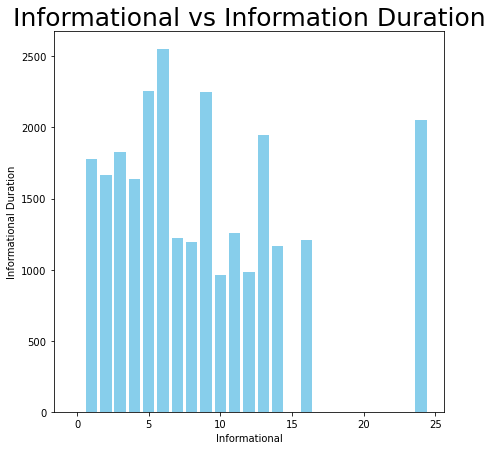

In [36]:
# Plotting the Informational vs Information Duration Distribution
plt.figure(figsize=(7, 7))
plt.bar(online_shop['Informational'], online_shop['Informational_Duration'],color='skyblue')
plt.xlabel('Informational')
plt.ylabel('Informational Duration')
plt.title('Informational vs Information Duration', fontsize = 25)
# plt.xticks([0, 1],[False, True]) 
plt.show()
# Observation:
# This shows the amount of time spent in different informational pages.
# There are around 20 different types of informational pages available.

Text(0.5, 1.0, 'BounceRates Vs ExitRates')

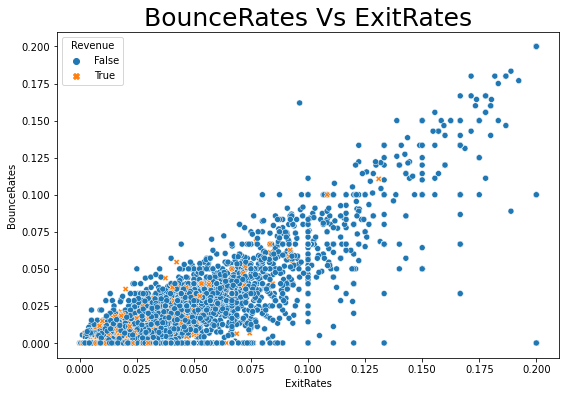

In [37]:
# Exit rates vs bounce rate 
plt.figure(figsize=(9, 6))
sns.scatterplot(data=online_shop, y='BounceRates',x='ExitRates',hue='Revenue',style='Revenue')
plt.title('BounceRates Vs ExitRates', fontsize = 25)

# Observation
# They have linear relation between them. 
# It can be said that high bounce rate contributes to high exit rated for certain pages

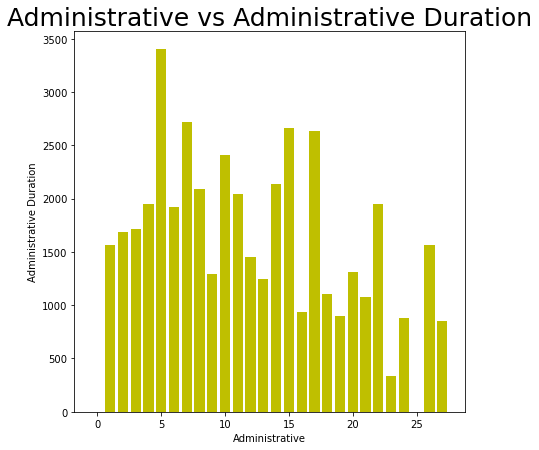

In [38]:
# Plotting the Administrative vs Administrative Duration  Duration Distribution
plt.figure(figsize=(7, 7))
plt.bar(online_shop['Administrative'], online_shop['Administrative_Duration'],color='y')
plt.xlabel('Administrative')
plt.ylabel('Administrative Duration')
plt.title('Administrative vs Administrative Duration', fontsize = 25)
plt.show()
# Observation:
# Shows the time spent on different types of administrative pages

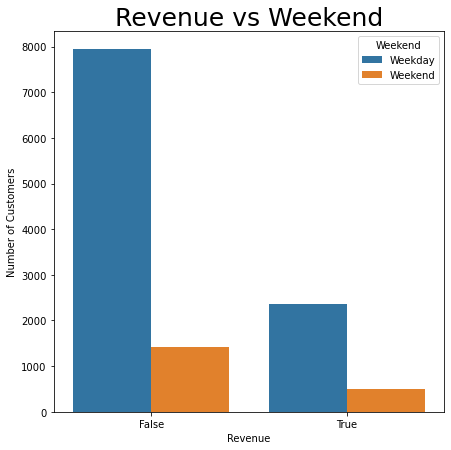

In [39]:
# Weekend vs Revenue
plt.figure(figsize=(7, 7))
sns.countplot(x='Weekend', hue='Revenue', data=online_shop)
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.title('Revenue vs Weekend', fontsize = 25)
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.show()

# Observation:
# 1: Visualises the Revenue on weekends and Weekdays

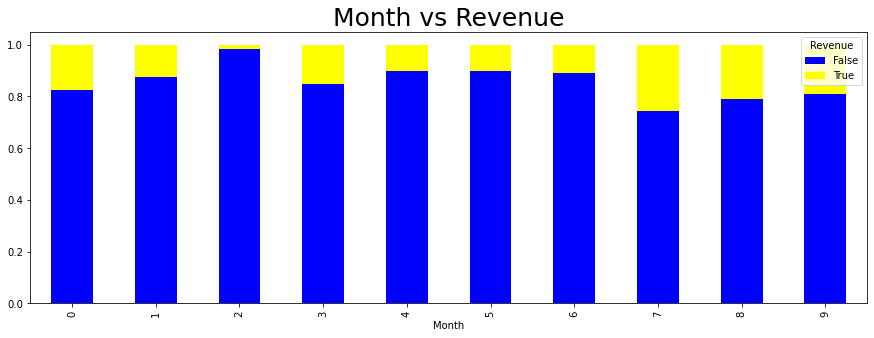

In [40]:
# bar plot for Month vs revenue

df = pd.crosstab(online_shop['Month'], online_shop['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['blue', 'yellow'])
plt.title('Month vs Revenue', fontsize = 25)
plt.show()

# Observation 
#1 It visualises the revenue calculated each month

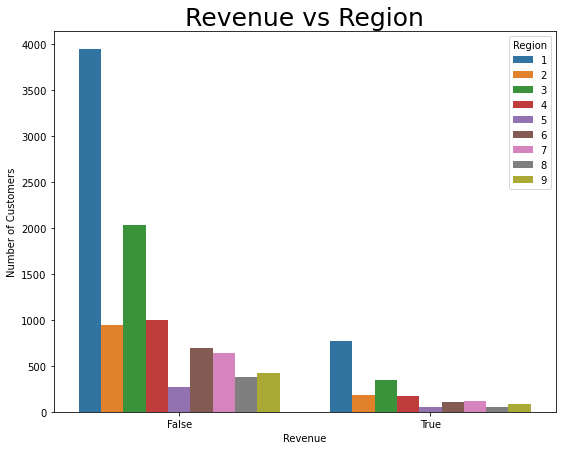

In [41]:
# Countplot to show Revenue vs Region
plt.figure(figsize=(9, 7))
sns.countplot(x='Revenue', hue='Region', data=online_shop)
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.title('Revenue vs Region', fontsize = 25)
plt.legend(title='Region')
plt.show()
# Observation 
#1 It visualises the type of revenue generated in each region.


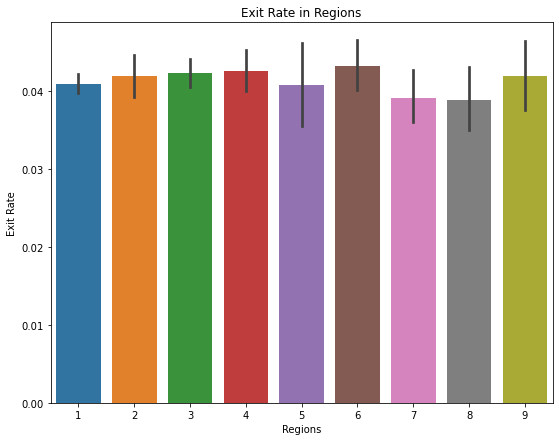

In [42]:
# Bounce rate in different regions
plt.figure(figsize=(9, 7))
sns.barplot(online_shop['Region'], online_shop['ExitRates'])
plt.title('Exit Rate in Regions')
plt.xlabel('Regions')
plt.ylabel('Exit Rate')
plt.show()


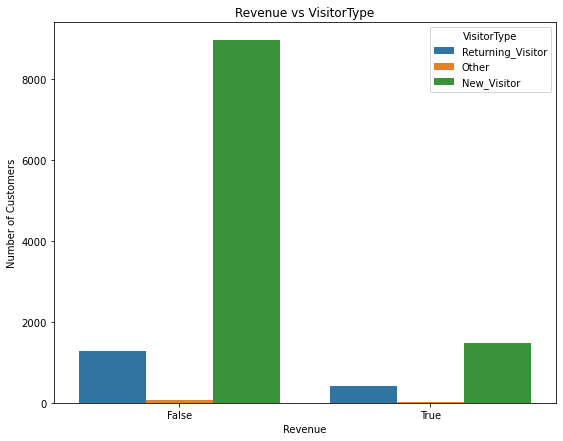

In [43]:
# Count plot to show revenue generated by different visitor type
plt.figure(figsize=(9, 7))
sns.countplot(x='Revenue', hue='VisitorType', data=online_shop)
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.title('Revenue vs VisitorType')
plt.legend(title='VisitorType', labels=['Returning_Visitor', 'Other', 'New_Visitor'])
plt.show()

# Observation:
# 1 New customer contribute more on generating revenue

# Task 3: Data Modelling

In [44]:
# Splitting the data into training and test
# Target column is 'Revenue'
x_train, x_test, y_train, y_test = train_test_split(online_shop.iloc[:,0:17],online_shop.iloc[:,17],test_size=0.30,random_state=4)

In [45]:
# Checking if the data has been properly splitted.
x_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
555,0,0.000000,1,90.0,11,1056.500000,0.018182,0.054545,0.000000,0.0,5,4,2,1,2,2,False
366,0,0.000000,0,0.0,13,226.000000,0.000000,0.053846,0.000000,0.0,5,2,2,4,3,2,True
4964,1,22.000000,0,0.0,2,5.000000,0.000000,0.066667,0.000000,0.0,6,2,2,3,4,2,False
11554,13,123.875000,0,0.0,87,2903.764417,0.006250,0.015280,1.773369,0.0,1,2,2,3,2,2,False
5149,6,169.566667,0,0.0,21,1853.535714,0.000000,0.021727,0.000000,0.0,6,3,2,4,4,2,True


In [46]:
# Checking the shape of training and test data 
print("Shape of x_train: " ,x_train.shape)
print("Shape of x_test: " ,x_test.shape)
print("Shape of y_train: " ,y_train.shape)
print("Shape of y_test: " ,y_test.shape)

Shape of x_train:  (8543, 17)
Shape of x_test:  (3662, 17)
Shape of y_train:  (8543,)
Shape of y_test:  (3662,)


In [47]:
# Training the model with KNN classifier having k =3.
clf = KNeighborsClassifier(3)
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
# Printing to see the predicted value
predicted

array([ True, False, False, ..., False, False, False])

In [48]:
# Confusion Matrix for KNN where k =3
confusion_matrix(y_test, predicted)

array([[2960,  154],
       [ 349,  199]], dtype=int64)

In [49]:
# Classification Report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      3114
        True       0.56      0.36      0.44       548

    accuracy                           0.86      3662
   macro avg       0.73      0.66      0.68      3662
weighted avg       0.85      0.86      0.85      3662



In [50]:
accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy for KNN where k = 3 is {accuracy}")

The accuracy for KNN where k = 3 is 0.8626433642818132


In [51]:
# Trying to find the best value for k by using Greedy Approach.(For fine tuning parameters)
# Finding best k with default parameters
k_values=range(1,11)
k_values
ac_scores=[]
# Running the possible k values in for loop
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors= k )
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores=accuracy_score(y_test,y_pred)
    ac_scores.append(scores)
    print (f"Accuracy Scores having k = {k} is: {scores}")
    
# Observation: The accuracy did not change much when k ranges from 1 to 10

Accuracy Scores having k = 1 is: 0.8339705079191698
Accuracy Scores having k = 2 is: 0.8659202621518296
Accuracy Scores having k = 3 is: 0.8626433642818132
Accuracy Scores having k = 4 is: 0.87001638448935
Accuracy Scores having k = 5 is: 0.8681048607318406
Accuracy Scores having k = 6 is: 0.872200983069361
Accuracy Scores having k = 7 is: 0.871381758601857
Accuracy Scores having k = 8 is: 0.8716548334243582
Accuracy Scores having k = 9 is: 0.8705625341343528
Accuracy Scores having k = 10 is: 0.87001638448935


In [52]:
# Trying to find the best value for k having weights = 'distance' and p ='1' by using Greedy Approach.(For fine tuning parameters)
k_values=range(1,11)
ac_scores=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors= k,weights='distance',p=1)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores=accuracy_score(y_test,y_pred)
    ac_scores.append(scores)
    print (f"Accuracy Scores having k = {k} is: {scores}")

# Observation: Best accuracy is when k = 5 and weights='distance' and p=1

Accuracy Scores having k = 1 is: 0.8399781540141998
Accuracy Scores having k = 2 is: 0.8399781540141998
Accuracy Scores having k = 3 is: 0.8585472419442928
Accuracy Scores having k = 4 is: 0.8637356635718186
Accuracy Scores having k = 5 is: 0.8702894593118514
Accuracy Scores having k = 6 is: 0.8683779355543418
Accuracy Scores having k = 7 is: 0.8667394866193336
Accuracy Scores having k = 8 is: 0.8675587110868378
Accuracy Scores having k = 9 is: 0.8659202621518296
Accuracy Scores having k = 10 is: 0.8651010376843256


In [53]:
# Trying to find the best value for k having weights = 'distance'  and p ='2' by using Greedy Approach.(For fine tuning parameters)
from sklearn.metrics import accuracy_score
possible_k=range(1,11)
possible_k
# best k score

ac_scores=[]
for k in possible_k:
    knn=KNeighborsClassifier(n_neighbors= k,weights='distance',p=2)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores=accuracy_score(y_test,y_pred)
    ac_scores.append(scores)
    print (f"Accuracy Scores having k = {k} is: {scores}")


Accuracy Scores having k = 1 is: 0.8339705079191698
Accuracy Scores having k = 2 is: 0.8339705079191698
Accuracy Scores having k = 3 is: 0.8607318405243036
Accuracy Scores having k = 4 is: 0.8623702894593118
Accuracy Scores having k = 5 is: 0.8651010376843256
Accuracy Scores having k = 6 is: 0.871381758601857
Accuracy Scores having k = 7 is: 0.8702894593118514
Accuracy Scores having k = 8 is: 0.8705625341343528
Accuracy Scores having k = 9 is: 0.869197160021846
Accuracy Scores having k = 10 is: 0.8708356089568542


In [54]:
# Using Hill Climbing to get the best features to train the model.

new_Ind = []
cur_MaxScore = 0.0
col_num = 17
col_Ind_Random = shuffle(range(0,col_num), random_state=6)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = online_shop.iloc[:,new_Ind]
    
    x_train, x_test, y_train, y_test = train_test_split(newData,online_shop.iloc[:,17], test_size=0.3, random_state=0)
    # Using the best parameters identified by Greedy search to use climbing
    clf = KNeighborsClassifier(5,weights='distance',p=1)
    fit = clf.fit(x_train, y_train)
    cur_Score = clf.score(x_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print(f"The best features are in the following indexes {new_Ind}" )

Score with 1 selected features: 0.8473511742217368
Score with 2 selected features: 0.8779355543418896
Score with 3 selected features: 0.8809393773894046
Score with 4 selected features: 0.883397050791917
Score with 5 selected features: 0.8844893500819224
Score with 6 selected features: 0.8877662479519388
The best features are in the following indexes [13, 8, 15, 0, 9, 10]


In [55]:
# Splitting the data with the above mentioned best features
x_train, x_test, y_train, y_test = train_test_split(online_shop.iloc[:,[13,8,15,0,10,9]],online_shop.iloc[:,17],test_size=0.30,random_state=4)

In [56]:
# Modelling the training data with KNN clasifier having k =3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt
clf = KNeighborsClassifier(5,weights='distance',p=1)
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
confusion_matrix(y_test, predicted)



array([[2951,  163],
       [ 241,  307]], dtype=int64)

In [57]:
# Classification Report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      3114
        True       0.65      0.56      0.60       548

    accuracy                           0.89      3662
   macro avg       0.79      0.75      0.77      3662
weighted avg       0.88      0.89      0.89      3662



In [58]:
accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy for KNN after using hill climbing is {accuracy}")

# Observation: The accuracy increased by 1 percent.

The accuracy for KNN after using hill climbing is 0.8896777717094484


In [59]:
# Applying K folds
kf = KFold(n_splits=5,random_state=None)
X =  online_shop.iloc[:, 0:17]
Y =  online_shop.iloc[:, 17]
sum=0
train_index = []
test_index = []
for k, (train_index, test_index) in enumerate(kf.split(online_shop)):
#     train_index.append(train_index)
#     test_index.append(test_index)
# #     print(train_index)
# #     print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    sum+= clf.score(X_test, y_test)*100
average_accuracy = sum / (k+1)
print(f"\nAverage accuracy across all folds: {average_accuracy}")


[fold 0] score: 0.90741
[fold 1] score: 0.90455
[fold 2] score: 0.84637
[fold 3] score: 0.81278
[fold 4] score: 0.81852

Average accuracy across all folds: 85.79270790659565


   # Decision Tree Classifier

In [60]:
# Splitting the data into training and  (including all 17 features in this)
# Target column is 'Revenue'
x_train, x_test, y_train, y_test = train_test_split(online_shop.iloc[:,0:17],online_shop.iloc[:,17],test_size=0.30,random_state=4)

In [61]:
clf = DecisionTreeClassifier()
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
cm

array([[2860,  254],
       [ 209,  339]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pre))
accuracy = accuracy_score(y_test, y_pre)
print(f"The accuracy for Decision tree is {accuracy}")

              precision    recall  f1-score   support

       False       0.93      0.92      0.93      3114
        True       0.57      0.62      0.59       548

    accuracy                           0.87      3662
   macro avg       0.75      0.77      0.76      3662
weighted avg       0.88      0.87      0.88      3662

The accuracy for Decision tree is 0.8735663571818678


In [63]:
from sklearn.model_selection import GridSearchCV
params  ={
'max_depth': [None, 5, 10, 15, 20], 
'min_samples_split': [10,15,20], 
'min_samples_leaf': [1, 2, 4]
}
dt2 = DecisionTreeClassifier()
np.random.seed(3) # setting random state. GridSearchCV doesn't have random state so grid_search = GridSearchCV(dt2, params, cv=5) # 5 folds
grid_search = GridSearchCV(dt2, params, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# Training the DecisionTreeClassifier with the best parameters
best_dt = DecisionTreeClassifier (**best_params)
best_dt.fit(x_train, y_train)
pred = best_dt.predict(x_test)
accuracy = accuracy_score (y_test, pred)
print("Best Accuracy of Decision Tree:", accuracy)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Accuracy of Decision Tree: 0.9120699071545604
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.8885630968710903


In [64]:
clf = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4, min_samples_split= 10)
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
cm

array([[3027,   87],
       [ 235,  313]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pre))
accuracy = accuracy_score(y_test, y_pre)
print(f"The accuracy for Decision tree is {accuracy}")

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      3114
        True       0.78      0.57      0.66       548

    accuracy                           0.91      3662
   macro avg       0.86      0.77      0.80      3662
weighted avg       0.91      0.91      0.91      3662

The accuracy for Decision tree is 0.9120699071545604


In [66]:
# Decision tree visualization 
from sklearn import tree
with open('Online_shopping.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,feature_names=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],class_names=online_shop['Revenue'].astype(str).tolist(), filled=True, rounded=True,special_characters=True)


In [67]:
# Using the feature_importance feature to cross verify
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
importance = tree.feature_importances_

feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
8                PageValues    0.428191
5   ProductRelated_Duration    0.081360
6               BounceRates    0.078239
7                 ExitRates    0.068995
1   Administrative_Duration    0.058162
4            ProductRelated    0.054948
10                    Month    0.043883
13                   Region    0.036979
0            Administrative    0.036427
3    Informational_Duration    0.025811
14              TrafficType    0.023300
11         OperatingSystems    0.020122
12                  Browser    0.011293
2             Informational    0.010422
15              VisitorType    0.009465
16                  Weekend    0.009180
9                SpecialDay    0.003220
